<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2016/KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Density Estimation

## References

[What Are The Odds? — Kernel Density Estimation](https://medium.com/analytics-vidhya/what-are-the-odds-kernel-density-estimation-75c9980931e4)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Random data generation

In [2]:
def random_data(num_points, n_randomization = 5):
    x = np.random.randn(num_points)

    for i in range(n_randomization):
        random_slice = int(np.random.rand() * num_points)
        x[random_slice:] += np.random.randint(3, 7)

    return x

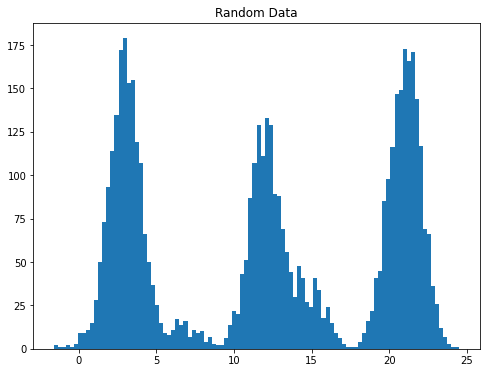

In [3]:
plt.figure(figsize = (8, 6))
plt.hist(random_data(5_000), bins = 100)
plt.title("Random Data")
plt.show()

## KDE

### Calculating KDE for a given distribution using a kernel

In [4]:
def kde(bandwidth, data, kernel, smoothness):
    mixture = np.zeros(smoothness)
    points = np.linspace(min(data), max(data), smoothness)

    for xi in data:
        mixture += kernel(points, xi, bandwidth)

    return mixture

### Gaussian Kernel for KDE estimation

In [5]:
def gaussian(x, xi, bandwidth):
    exp_section = np.exp(-np.power(x - xi, 2.0))
    return exp_section / (2 * np.power(bandwidth, 2.0))

### Sample Data

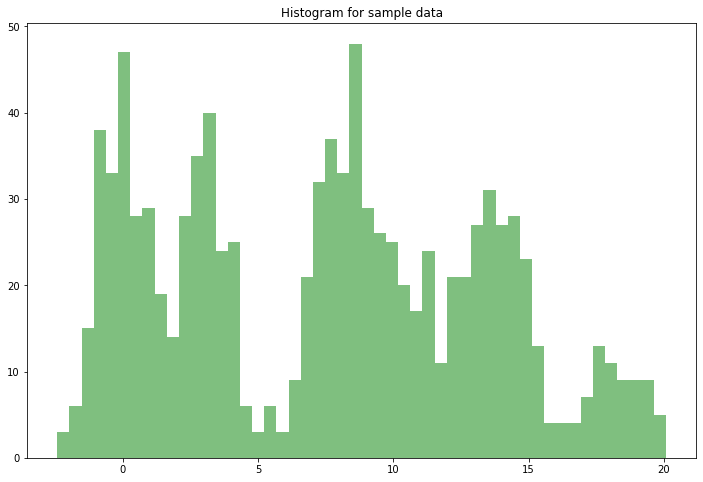

In [6]:
dist = random_data(1_000)
hist = np.histogram(dist, bins = 50)[1]

plt.figure(figsize = (12, 8))
plt.hist(dist, bins = 50, alpha = 0.5, color = 'green', label = 'True Distribution')
plt.title("Histogram for sample data")
plt.show()

### Calculating KDE for the sample data

In [7]:
bandwidth = 0.5
smoothness = 1_000

kde_values = kde(bandwidth, dist, gaussian, smoothness)
kde_values.shape

(1000,)

### KDE Visualization

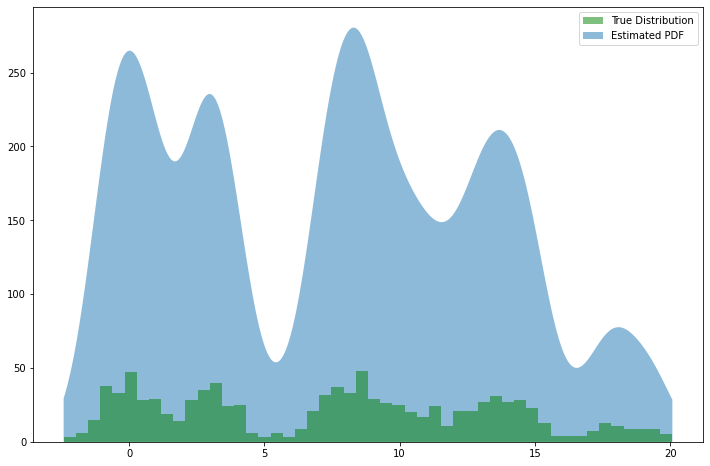

In [8]:
points = np.linspace(min(dist), max(dist), smoothness)

plt.figure(figsize = (12, 8))
plt.hist(dist, bins = 50, alpha = 0.5, color = 'green', label = 'True Distribution')

plt.fill_between(points, kde_values, alpha = 0.5, label = 'Estimated PDF')
plt.legend(loc = 'upper right')
plt.show()

### Normalizing KDE

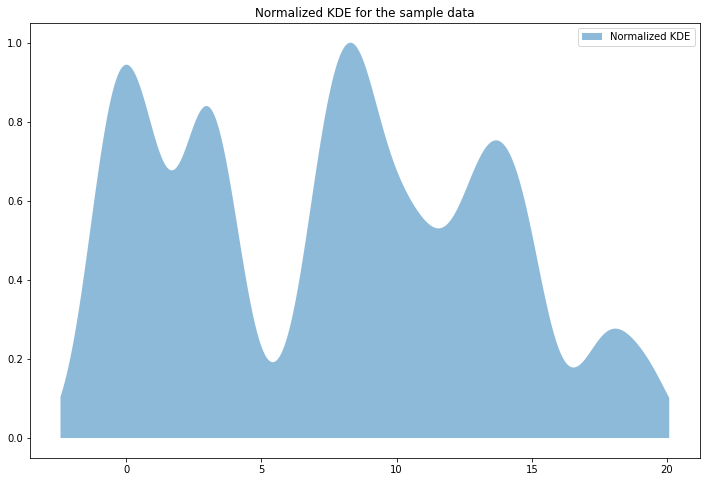

In [9]:
norm_kde_values = kde_values/np.abs(kde_values).max(axis=0)

plt.figure(figsize = (12, 8))

plt.fill_between(points, norm_kde_values, alpha = 0.5, label = 'Normalized KDE')
plt.title('Normalized KDE for the sample data')
plt.legend(loc = 'upper right')
plt.show()

### Visualizing KDE at a few specific points

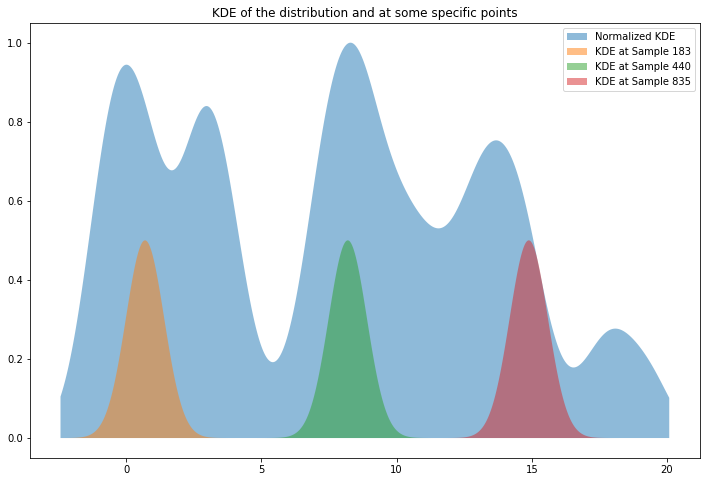

In [10]:
sample_points = sorted(np.random.randint(0, len(dist), size = 3))


plt.figure(figsize = (12, 8))
plt.fill_between(points, norm_kde_values, alpha = 0.5, label = 'Normalized KDE')

for i in sample_points:
    sample_kde = gaussian(points, dist[i], bandwidth)
    sample_kde /= np.abs(sample_kde).max(axis=0) * 2
    plt.fill_between(points, sample_kde, alpha = 0.5, label = f'KDE at Sample {i}')

plt.title('KDE of the distribution and at some specific points')
plt.legend(loc = 'upper right')
plt.show()